In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_theme(font_scale=1.5, style = 'whitegrid', context= 'notebook')
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from itertools import product
import dash
from dash import dcc, html, Input, Output
import scipy as sp
from pybaselines import Baseline
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.special import expit
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.integrate import cumulative_trapezoid
import math
#from pybaselines import Baseline

#oadeji01
os.chdir('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\20250612')#\\fitted')\\20250609_fitted
#os.chdir('C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Han\\20210331E1\\selected data')

In [77]:
glass = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\glass_spec.csv')
#.value
g_mean = glass.iloc[:, 1:].mean()
#glass[glass['sample'] == 'GlassSlide'].iloc[:, 5:].mean()
#norm_g = (g_mean.values/np.max(g_mean.values))*1000

In [3]:
df = pd.read_csv('20250612_norm.csv')

In [81]:
df[df['trt_time'].str.contains('2mins')]

,exp,sample,trt_time,orient,spectra_num,details,753.655,754.797,755.939,757.08,...,1727.84,1728.72,1729.59,1730.47,1731.35,1732.22,1733.1,1733.97,1734.85,1735.72
24,20250612,Ctrl,2mins,Orth,1,20250612_Ctrl_2mins_Orth,0.082617,0.109229,0.133433,0.155140,...,0.118928,0.123678,0.127629,0.130636,0.132379,0.132565,0.130904,0.127104,0.120873,0.111919
25,20250612,Ctrl,2mins,Orth,3,20250612_Ctrl_2mins_Orth,0.127292,0.160736,0.187963,0.209354,...,0.185986,0.190030,0.194250,0.198546,0.202399,0.205512,0.207586,0.208323,0.207425,0.204593
26,20250612,Ctrl,2mins,Orth,5,20250612_Ctrl_2mins_Orth,-0.003138,0.025567,0.050965,0.073269,...,0.138637,0.142767,0.145678,0.147390,0.148181,0.148077,0.147106,0.145294,0.142669,0.139257
27,20250612,Ctrl,2mins,Orth,14,20250612_Ctrl_2mins_Orth,0.013042,0.027945,0.043536,0.059429,...,0.100354,0.101629,0.101578,0.100160,0.097383,0.093164,0.087416,0.080055,0.070996,0.060155
28,20250612,Ctrl,2mins,Orth,16,20250612_Ctrl_2mins_Orth,0.003196,0.026585,0.049707,0.072145,...,0.119491,0.125058,0.129680,0.133241,0.135448,0.136023,0.134688,0.131164,0.125172,0.116434
29,20250612,Ctrl,2mins,Orth,18,20250612_Ctrl_2mins_Orth,0.003581,0.029089,0.051275,0.070405,...,0.133373,0.136646,0.138795,0.139706,0.139361,0.137677,0.134568,0.129950,0.123736,0.115843
30,20250612,Ctrl,2mins,Para,1,20250612_Ctrl_2mins_Para,0.001543,0.021867,0.043046,0.064539,...,0.217336,0.225228,0.230303,0.233062,0.234123,0.233541,0.231366,0.227651,0.222447,0.215806
31,20250612,Ctrl,2mins,Para,3,20250612_Ctrl_2mins_Para,0.260421,0.273170,0.284232,0.293373,...,0.106704,0.114424,0.121313,0.127267,0.130656,0.130629,0.126335,0.116925,0.101547,0.079352
32,20250612,Ctrl,2mins,Para,5,20250612_Ctrl_2mins_Para,0.114132,0.091830,0.078273,0.071969,...,0.145797,0.154902,0.163567,0.170497,0.175464,0.177882,0.177165,0.172725,0.163977,0.150334
33,20250612,Ctrl,2mins,Para,7,20250612_Ctrl_2mins_Para,0.025377,0.054052,0.078458,0.098909,...,0.134968,0.142373,0.148141,0.152147,0.154389,0.154661,0.152755,0.148462,0.141576,0.131887


In [10]:
df_bl = df[df['trt_time'].str.contains('2mins')]
#df[df['sample'].str.contains('bl')==False]
df_bl

,exp,sample,trt_time,orient,spectra_num,details,753.655,754.797,755.939,757.08,...,1727.84,1728.72,1729.59,1730.47,1731.35,1732.22,1733.1,1733.97,1734.85,1735.72
24,20250612,Ctrl,2mins,Orth,1,20250612_Ctrl_2mins_Orth,0.082617,0.109229,0.133433,0.155140,...,0.118928,0.123678,0.127629,0.130636,0.132379,0.132565,0.130904,0.127104,0.120873,0.111919
25,20250612,Ctrl,2mins,Orth,3,20250612_Ctrl_2mins_Orth,0.127292,0.160736,0.187963,0.209354,...,0.185986,0.190030,0.194250,0.198546,0.202399,0.205512,0.207586,0.208323,0.207425,0.204593
26,20250612,Ctrl,2mins,Orth,5,20250612_Ctrl_2mins_Orth,-0.003138,0.025567,0.050965,0.073269,...,0.138637,0.142767,0.145678,0.147390,0.148181,0.148077,0.147106,0.145294,0.142669,0.139257
27,20250612,Ctrl,2mins,Orth,14,20250612_Ctrl_2mins_Orth,0.013042,0.027945,0.043536,0.059429,...,0.100354,0.101629,0.101578,0.100160,0.097383,0.093164,0.087416,0.080055,0.070996,0.060155
28,20250612,Ctrl,2mins,Orth,16,20250612_Ctrl_2mins_Orth,0.003196,0.026585,0.049707,0.072145,...,0.119491,0.125058,0.129680,0.133241,0.135448,0.136023,0.134688,0.131164,0.125172,0.116434
29,20250612,Ctrl,2mins,Orth,18,20250612_Ctrl_2mins_Orth,0.003581,0.029089,0.051275,0.070405,...,0.133373,0.136646,0.138795,0.139706,0.139361,0.137677,0.134568,0.129950,0.123736,0.115843
30,20250612,Ctrl,2mins,Para,1,20250612_Ctrl_2mins_Para,0.001543,0.021867,0.043046,0.064539,...,0.217336,0.225228,0.230303,0.233062,0.234123,0.233541,0.231366,0.227651,0.222447,0.215806
31,20250612,Ctrl,2mins,Para,3,20250612_Ctrl_2mins_Para,0.260421,0.273170,0.284232,0.293373,...,0.106704,0.114424,0.121313,0.127267,0.130656,0.130629,0.126335,0.116925,0.101547,0.079352
32,20250612,Ctrl,2mins,Para,5,20250612_Ctrl_2mins_Para,0.114132,0.091830,0.078273,0.071969,...,0.145797,0.154902,0.163567,0.170497,0.175464,0.177882,0.177165,0.172725,0.163977,0.150334
33,20250612,Ctrl,2mins,Para,7,20250612_Ctrl_2mins_Para,0.025377,0.054052,0.078458,0.098909,...,0.134968,0.142373,0.148141,0.152147,0.154389,0.154661,0.152755,0.148462,0.141576,0.131887


In [ ]:
import pandas as pd
import os

def export_spectra(df, meta_col, output_dir="spectra_txt"):
    """
    Exports each row of a dataframe as a txt file with wavenumber and intensity.
    
    df: DataFrame, spectral data with metadata
    meta_col: str, column name to use for file names
    output_dir: str, folder to save txt files
    """
    os.makedirs(output_dir, exist_ok=True)
    
    # wavenumbers are assumed to be the column headers after metadata
    wavenumbers = df.columns[4:].astype(float)  # adjust index if needed
    
    for idx, row in df.iterrows():
        sample_name = str(row[meta_col])  # filename from metadata
        intensities = row.iloc[4:].values  # spectral data
        
        # build dataframe for export
        spectrum = pd.DataFrame({
            "Wavenumber": wavenumbers,
            "Intensity": intensities
        })
        
        # write to txt file (tab-delimited, no header, no index)
        file_path = os.path.join(output_dir, f"{sample_name}.txt")
        spectrum.to_csv(file_path, sep="\t", index=False, header=False)
    
    print(f"Exported {len(df)} spectra to '{output_dir}'")

# Example usage:
# export_spectra(df, meta_col="SampleID")


In [15]:
os.makedirs('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Han\\20210331E1\\selected data\\bunmi_txt', exist_ok=True)
    
    # wavenumbers are assumed to be the column headers after metadata
wavenumbers = df_bl.columns[6:].astype(float)  # adjust index if needed
    
for idx, row in df_bl.iterrows():
    sample_name = str(row['details'])  # filename from metadata
    intensities = row.iloc[6:].values  # spectral data
        
        # build dataframe for export
    spectrum = pd.DataFrame({
            "Wavenumber": wavenumbers,
            "Intensity": intensities
        })
        
        # write to txt file (tab-delimited, no header, no index)
    file_path = os.path.join('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Han\\20210331E1\\selected data\\bunmi_txt', f"{sample_name}_{idx}.txt")
    spectrum.to_csv(file_path, sep="\t", index=False, header=False)
    
#print(f"Exported {len(df)} spectra to '{output_dir}'")

In [11]:
# Specify the column to use for filenames
filename_column = 'details'

# Specify the directory to save the files (optional, create if it doesn't exist)
output_directory = 'c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Han\\20210331E1\\selected data\\bunmi_txt'
import os

# Iterate through each row and save as a separate text file
for index, row in df_bl.iterrows():
    filename = os.path.join(output_directory, f"{row[filename_column]}.txt")
    
    # Prepare the content for the text file (e.g., all columns except the filename column)
    content = row.drop(filename_column).to_string(header=True, index=False)
    
    with open(filename, 'w') as f:
        f.write(content)

print(f"Successfully exported {len(df_bl)} rows as separate text files in '{output_directory}' directory.")

Successfully exported 35 rows as separate text files in 'c:\Users\oadeji01\OneDrive - Tufts\Bunmi - NavehLab-01\Raman_Bunmi\Han\20210331E1\selected data\bunmi_txt' directory.


In [ ]:
os.chdir('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Han\\20210331E1\\selected data\\bunmi_txt')
for i in range(len(df_bl)): 
    df_bl.iloc[i, 5:].to_csv(str(i)+".txt")

AttributeError: 'str' object has no attribute 'to_csv'

In [83]:
def baseline_poly_with_anchors(df, degree, anchor_points, regions):
    # 1) get wavenumbers (x-axis)
    x_full = df.columns.astype(float).to_numpy()#.columns[4:]
    
    # 2) find candidate indices in union of regions
    mask = np.zeros_like(x_full, dtype=bool)
    for low, high in regions:
        mask |= (x_full >= low) & (x_full <= high)
    cand_idx = np.where(mask)[0]
    if cand_idx.size < anchor_points:
        raise ValueError(f"only {cand_idx.size} points in regions but need {anchor_points}")
    
    # 3) pick exactly `anchor_points` evenly from candidates
    pick_idx = cand_idx[np.linspace(0, cand_idx.size-1, anchor_points, dtype=int)]
    x_anchors = x_full[pick_idx]
    
    corrected_list = []
    for _, row in df.iterrows():
        #print(row)
        y = row.iloc[:].astype(float).to_numpy()#
        y_anchors = y[pick_idx]
        
        # 4) fit and subtract
        coeffs = np.polyfit(x_anchors, y_anchors, degree)
        baseline = np.polyval(coeffs, x_full)
        y_corr = y - baseline
        
        # 5) shift minimum to zero
        y_corr -= y_corr.min()
        corrected_list.append(y_corr)
    
    # assemble result
    corrected_df = pd.DataFrame(
        corrected_list,
        index=df.index,
        columns=x_full
    )
    return corrected_df


In [86]:
# ——— Example usage ———
# assume you’ve already loaded your DataFrame `df`
degree        = 5
anchor_points = 159
regions       = [(750, 752), (777, 784), (795, 805), (1009, 1020), (1110, 1120), (1143, 1156), (1215, 1226), (1500,1607), (1694,1730)]

#corrected = baseline_poly_with_anchors(corrected_df, degree, anchor_points, regions) #.iloc[:, 5:]
corrected = baseline_poly_with_anchors(df_bl.iloc[:, 6:], degree, anchor_points, regions)

In [87]:
corrected

,753.655,754.797,755.939,757.080,758.221,759.362,760.503,761.642,762.782,763.922,...,1727.840,1728.720,1729.590,1730.470,1731.350,1732.220,1733.100,1733.970,1734.850,1735.720
24,0.079302,0.105785,0.129863,0.151444,0.170439,0.186757,0.200310,0.211006,0.218116,0.222047,...,0.115160,0.119879,0.123799,0.126775,0.128485,0.128640,0.126946,0.123112,0.116847,0.107859
25,0.106699,0.140073,0.167230,0.188552,0.204420,0.215215,0.221319,0.223113,0.220601,0.212932,...,0.162465,0.166494,0.170699,0.174978,0.178816,0.181912,0.183970,0.184691,0.183775,0.180926
26,0.000000,0.028617,0.053929,0.076148,0.095485,0.112154,0.126367,0.138335,0.148578,0.156919,...,0.141884,0.146019,0.148934,0.150651,0.151446,0.151347,0.150381,0.148574,0.145953,0.142546
27,0.013792,0.028715,0.044327,0.060240,0.076065,0.091414,0.105900,0.119134,0.128302,0.135287,...,0.102181,0.103456,0.103404,0.101985,0.099207,0.094986,0.089237,0.081875,0.072815,0.061973
28,0.003849,0.027167,0.050219,0.072588,0.093859,0.113614,0.131437,0.146910,0.156240,0.162550,...,0.118541,0.124103,0.128719,0.132274,0.134476,0.135045,0.133704,0.130174,0.124177,0.115433
29,0.005619,0.031028,0.053116,0.072150,0.088398,0.102126,0.113602,0.123093,0.131370,0.137973,...,0.133357,0.136619,0.138757,0.139655,0.139298,0.137602,0.134480,0.129849,0.123622,0.115716
30,0.000000,0.020075,0.041008,0.062259,0.083286,0.103549,0.122509,0.139623,0.153408,0.164012,...,0.207316,0.215206,0.220279,0.223035,0.224094,0.223509,0.221332,0.217613,0.212407,0.205763
31,0.252189,0.264794,0.275713,0.284712,0.291558,0.296016,0.297853,0.296833,0.291906,0.283012,...,0.096846,0.104589,0.111499,0.117477,0.120889,0.120885,0.116615,0.107228,0.091875,0.069704
32,0.113417,0.090955,0.077240,0.070781,0.070086,0.073665,0.080027,0.087681,0.089929,0.094346,...,0.140139,0.149239,0.157899,0.164824,0.169785,0.172198,0.171475,0.167030,0.158276,0.144626
33,0.026822,0.055405,0.079722,0.100084,0.116804,0.130195,0.140571,0.148243,0.153482,0.156220,...,0.137211,0.144658,0.150469,0.154517,0.156803,0.157119,0.155257,0.151009,0.144169,0.134526


C:\Users\oadeji01\AppData\Local\Temp\ipykernel_19116\284479529.py:8: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\oadeji01\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


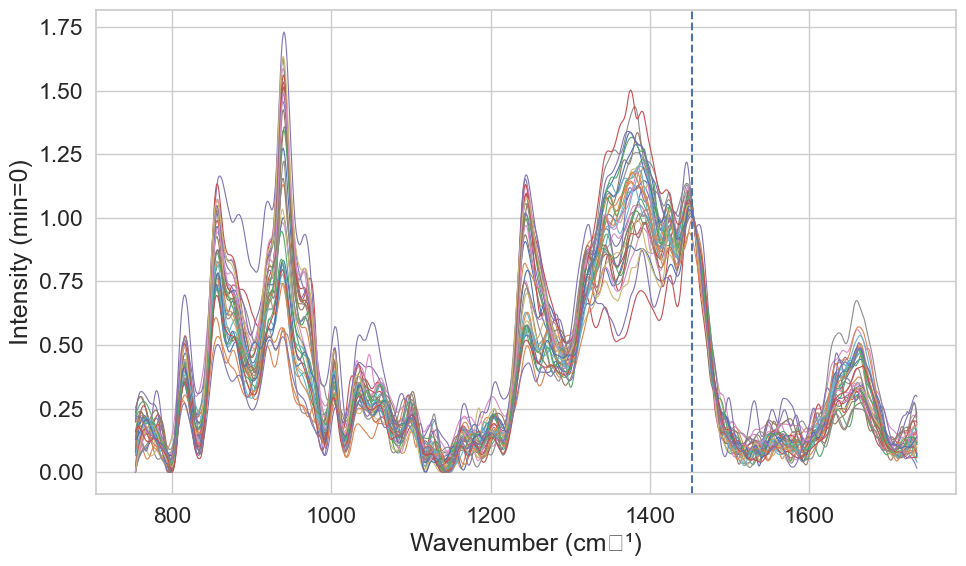

In [88]:
# quick plot of first 3 corrected spectra
plt.figure(figsize=(10,6))
for i in range(len(corrected)):
    sns.lineplot(x=corrected.columns.astype(float), y=corrected.iloc[i, :], lw=0.8)
plt.xlabel("Wavenumber (cm\u207B\u00B9)")
plt.ylabel("Intensity (min=0)")
#plt.title(f"{degree}ᵗʰ‑order baseline, {anchor_points} anchors")
plt.tight_layout()
plt.axvline(1453, ls = '--')
plt.show()

In [89]:
#Han's
smoothed_list = []
for x in range(len(corrected)):
    smoothed_list.append(sp.signal.savgol_filter(x= corrected.iloc[x, :], window_length=15, polyorder=3))
    #print(x)

smoothed_xx = pd.DataFrame(smoothed_list, columns=corrected.columns)
smoothed_df = pd.concat([df_bl.iloc[:, :6].reset_index(drop=True), smoothed_xx], axis=1)

In [91]:
#smoothed_df.iloc[:, 6]/
smoothed_df.iloc[:, 676]

0     0.996456
1     0.977487
2     1.005436
3     1.002152
4     1.000261
5     1.000299
6     0.990014
7     0.995451
8     0.995300
9     0.999945
10    0.994142
11    0.981440
12    0.998519
13    1.003879
14    0.998147
15    0.999481
16    0.992866
17    1.006487
18    0.996284
19    0.995028
20    0.997546
21    1.003611
22    0.999331
23    0.991762
24    0.997446
25    0.984216
26    0.994647
27    0.999508
28    0.996429
29    0.997040
30    0.994376
31    0.892703
32    0.995012
33    0.998327
34    0.998968
Name: 1455.11, dtype: float64

In [92]:
# Normalize data to a specific wavelength1455.0341
norm = smoothed_df.iloc[:, 6:].div(smoothed_df.iloc[:, 676], axis=0)#dt.iloc[:, 5:].sum(axis=1)
dt_norm = pd.concat([smoothed_df.iloc[:, :6], norm], axis=1)
dt_norm
#dt_norm.to_csv('20250609_norm.csv', index=False)

,exp,sample,trt_time,orient,spectra_num,details,753.655,754.797,755.939,757.08,...,1727.84,1728.72,1729.59,1730.47,1731.35,1732.22,1733.1,1733.97,1734.85,1735.72
0,20250612,Ctrl,2mins,Orth,1,20250612_Ctrl_2mins_Orth,0.078689,0.106333,0.131030,0.152790,...,0.115776,0.120225,0.124088,0.127133,0.128931,0.129164,0.127516,0.123668,0.117303,0.108105
1,20250612,Ctrl,2mins,Orth,3,20250612_Ctrl_2mins_Orth,0.106828,0.143739,0.172896,0.194966,...,0.166907,0.170791,0.174939,0.179114,0.182866,0.185911,0.187967,0.188749,0.187973,0.185356
2,20250612,Ctrl,2mins,Orth,5,20250612_Ctrl_2mins_Orth,0.000222,0.028423,0.053462,0.075529,...,0.140200,0.144293,0.147441,0.149533,0.150705,0.150911,0.150106,0.148244,0.145282,0.141172
3,20250612,Ctrl,2mins,Orth,14,20250612_Ctrl_2mins_Orth,0.012759,0.028955,0.045119,0.061012,...,0.101387,0.102694,0.102828,0.101614,0.099045,0.094996,0.089342,0.081959,0.072721,0.061504
4,20250612,Ctrl,2mins,Orth,16,20250612_Ctrl_2mins_Orth,0.001242,0.027922,0.052481,0.074900,...,0.118372,0.123749,0.128443,0.132108,0.134444,0.135135,0.133869,0.130329,0.124202,0.115173
5,20250612,Ctrl,2mins,Orth,18,20250612_Ctrl_2mins_Orth,0.005840,0.030945,0.052897,0.071928,...,0.132687,0.136151,0.138491,0.139541,0.139322,0.137727,0.134649,0.129981,0.123616,0.115447
6,20250612,Ctrl,2mins,Para,1,20250612_Ctrl_2mins_Para,-0.001176,0.020471,0.042329,0.063962,...,0.206904,0.214406,0.220343,0.224330,0.226605,0.226986,0.225289,0.221332,0.214930,0.205900
7,20250612,Ctrl,2mins,Para,3,20250612_Ctrl_2mins_Para,0.251850,0.266291,0.278149,0.287358,...,0.098091,0.105922,0.113002,0.118479,0.121408,0.121014,0.116521,0.107156,0.092143,0.070707
8,20250612,Ctrl,2mins,Para,5,20250612_Ctrl_2mins_Para,0.110282,0.092248,0.080626,0.074396,...,0.140900,0.149674,0.158033,0.165212,0.170505,0.173229,0.172704,0.168248,0.159179,0.144817
9,20250612,Ctrl,2mins,Para,7,20250612_Ctrl_2mins_Para,0.025540,0.055665,0.080733,0.101222,...,0.135958,0.143288,0.149472,0.154080,0.156938,0.157720,0.156102,0.151758,0.144362,0.133589


In [102]:
ctrl_mean = dt_norm[dt_norm['sample'].str.contains('Ctrl')].iloc[:, 6:].mean()
mean_2min = dt_norm[(dt_norm['sample'].str.contains('Trt')) & (dt_norm['trt_time'].str.contains('24h') == False)].iloc[:, 6:].mean()
diff = mean_2min - ctrl_mean

C:\Users\oadeji01\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\oadeji01\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


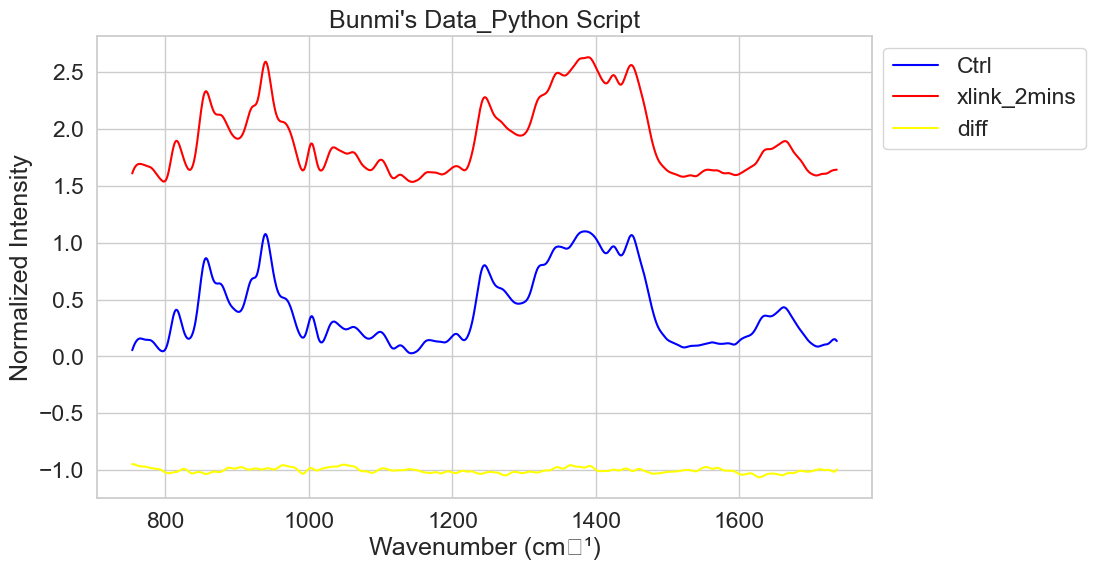

In [104]:
plt.figure(figsize=(10,6))
sns.lineplot(
    x = ctrl_mean.index.astype(float),
    y = ctrl_mean.values,
    label = 'Ctrl',
    color = 'blue'
)
sns.lineplot(
    x = mean_2min.index.astype(float),
    y = mean_2min.values + 1.5,
    label = 'xlink_2mins',
    color = 'red'
)
sns.lineplot(
    x = diff.index.astype(float),
    y = diff.values -1,
    label = 'diff',
    color = 'yellow'
)
plt.xlabel("Wavenumber (cm\u207B\u00B9)")
plt.ylabel("Normalized Intensity")
plt.title("Bunmi's Data_Python Script")
plt.legend(bbox_to_anchor = (1, 1))

In [ ]:
plt.figure(figsize=(10,6))
for i in range(len(dt_norm)):
    sns.lineplot(x=dt_norm.columns.astype(float), y=dt_norm.iloc[i, :], lw=0.8)
plt.xlabel("Wavenumber (cm\u207B\u00B9)")
plt.ylabel("Intensity (min=0)")
#plt.title(f"{degree}ᵗʰ‑order baseline, {anchor_points} anchors")
plt.tight_layout()
plt.axvline(1453, ls = '--')
plt.show()